# Task 6.4 Supervised Machine Learning

## Table of Contents

### 1. Importing Libraries and Data

### 2. Checking for Extreme Values

### 3. Data Prep for Regression Analysis

### 4. Regression Analysis

### 1. Importing Libraries and Data

In [107]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [50]:
# Import data
df_sal = pd.read_csv(r'/Users/melanie/Desktop/Data Science and STEM Salaries/Data/Levels_Fyi_Salary_Data_cleaned4.csv')

In [51]:
df_sal.head()

,company,title,total_yearly_compensation,city,state,years_of_experience,years_at_company,base_salary,bonus,gender,city_id,Masters_Degree,Bachelors_Degree,Doctorate_Degree,High_School,Some_College
0,Oracle,Product Manager,127000.0,Redwood City,California,1.5,1.5,107000.0,10000.0,Unknown,7392.0,0.0,0.0,0.0,0.0,0.0
1,eBay,Software Engineer,100000.0,San Francisco,California,5.0,3.0,0.0,0.0,Unknown,7419.0,0.0,0.0,0.0,0.0,0.0
2,Amazon,Product Manager,310000.0,Seattle,Washington,8.0,0.0,155000.0,0.0,Unknown,11527.0,0.0,0.0,0.0,0.0,0.0
3,Apple,Software Engineering Manager,372000.0,Sunnyvale,California,7.0,5.0,157000.0,35000.0,Unknown,7472.0,0.0,0.0,0.0,0.0,0.0
4,Microsoft,Software Engineer,157000.0,Mountain View,California,5.0,3.0,0.0,0.0,Unknown,7322.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Checking for missing values (this has been done in a previous task)
df_sal.isnull().sum()

company                      0
title                        0
total_yearly_compensation    0
city                         0
state                        0
years_of_experience          0
years_at_company             0
base_salary                  0
bonus                        0
gender                       0
city_id                      0
Masters_Degree               0
Bachelors_Degree             0
Doctorate_Degree             0
High_School                  0
Some_College                 0
dtype: int64

### 2. Checking for Extreme Values

<AxesSubplot:xlabel='total_yearly_compensation', ylabel='Count'>

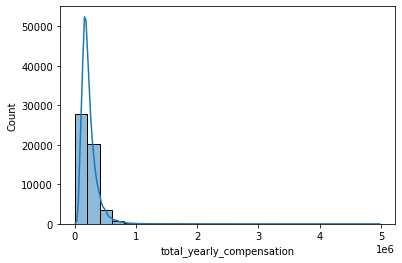

In [53]:
sns.histplot(df_sal['total_yearly_compensation'], bins=25, kde = True) 

<AxesSubplot:xlabel='base_salary', ylabel='Count'>

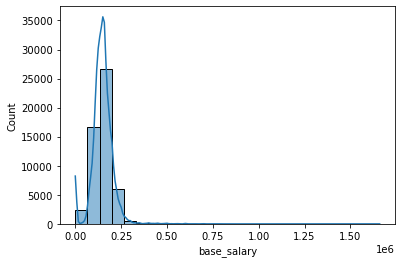

In [54]:
sns.histplot(df_sal['base_salary'], bins=25, kde = True) 

<AxesSubplot:xlabel='years_of_experience', ylabel='Count'>

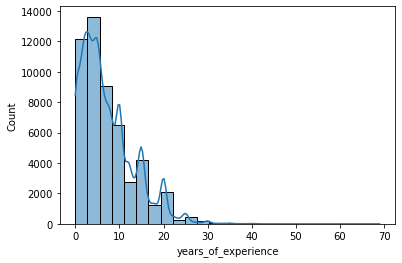

In [55]:
sns.histplot(df_sal['years_of_experience'], bins=25, kde = True) 

<AxesSubplot:xlabel='years_at_company', ylabel='Count'>

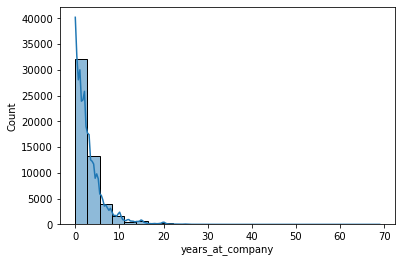

In [56]:
sns.histplot(df_sal['years_at_company'], bins=25, kde = True) 

 #### Some of the outliers may need to be removed, but let's try without having to do so. 

### 3. Data Prep for Regression Analysis 

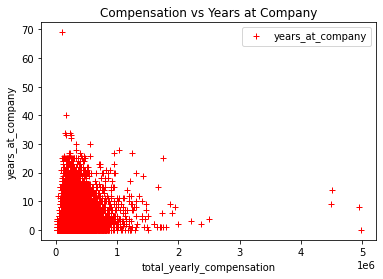

In [82]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1. total_yearly_compensation vs years_at_company
df_sal.plot(x = 'total_yearly_compensation', y ='years_at_company',style ='r+')
plt.title('Compensation vs Years at Company')  
plt.xlabel('total_yearly_compensation')  
plt.ylabel('years_at_company')  
plt.show()

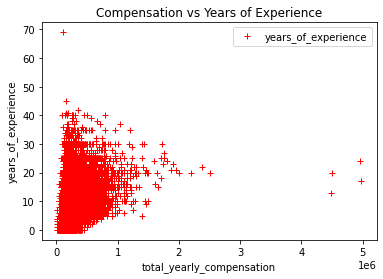

In [83]:
# 2. total_yearly_compensation vs years_of_experience
df_sal.plot(x = 'total_yearly_compensation', y ='years_of_experience',style ='r+')
plt.title('Compensation vs Years of Experience')  
plt.xlabel('total_yearly_compensation')  
plt.ylabel('years_of_experience')  
plt.show()

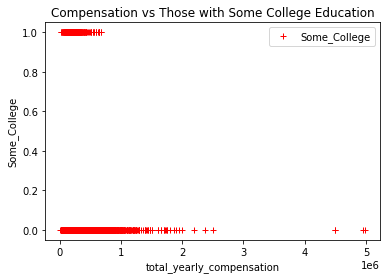

In [94]:
# 6. total_yearly_compensation vs Some_College
df_sal.plot(x = 'total_yearly_compensation', y ='Some_College',style ='r+')
plt.title('Compensation vs Those with Some College Education')  
plt.xlabel('total_yearly_compensation')  
plt.ylabel('Some_College')  
plt.show()

#### Hypothesis: The more years of experience you have, the better total compensation. 

In [99]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sal['total_yearly_compensation'].values.reshape(-1,1)
y = df_sal['years_of_experience'].values.reshape(-1,1)

In [100]:
X

array([[127000.],
       [100000.],
       [310000.],
       ...,
       [220000.],
       [280000.],
       [200000.]])

In [101]:
y

array([[ 1.5],
       [ 5. ],
       [ 8. ],
       ...,
       [14. ],
       [ 8. ],
       [ 0. ]])

In [102]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [108]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [110]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [111]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

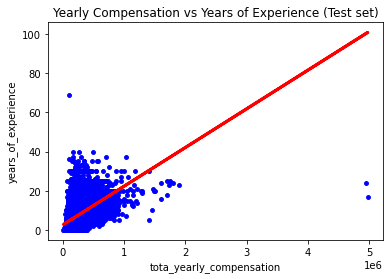

In [112]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Yearly Compensation vs Years of Experience (Test set)')
plot_test.xlabel('tota_yearly_compensation')
plot_test.ylabel('years_of_experience')
plot_test.show()

In [113]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [114]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.97287086e-05]]
Mean squared error:  29.27648444585413
R2 score:  0.18514785350962293


#### The slope indicates a positive relationship between the two variables, but the r2 value indicates a poor fit. 

In [115]:
y_predicted

array([[5.97859478],
       [5.3472761 ],
       [8.46441206],
       ...,
       [6.55072733],
       [6.55072733],
       [4.77514355]])

In [116]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.0,5.978595
1,6.0,5.347276
2,6.0,8.464412
3,10.0,5.564292
4,6.0,7.399062
5,7.0,6.846658
6,5.0,6.452084
7,10.0,7.576620
8,7.0,5.307819
9,6.0,6.156153


In [117]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [118]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [119]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.97287086e-05]]
Mean squared error:  28.10770810679997
R2 score:  0.20229901249479554


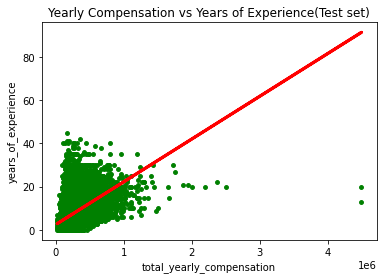

In [120]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Yearly Compensation vs Years of Experience(Test set)')
plot_test.xlabel('total_yearly_compensation')
plot_test.ylabel('years_of_experience')
plot_test.show()

#### This model is better than the first, as the r2 score is slightly higher, but it still indicates a poor fit. Removing the outliers may have helped some, but I don't think it would have changed this data enough to have a different outcome. 